# Vanilla Gradient Descent

implementation of gradient descent using only numpy

Notes:

<a href>http://cs229.stanford.edu/notes/cs229-notes1.pdf</a>

In [1]:
import numpy as np
from functools import reduce
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('banks.csv')

In [3]:
data = data.drop(['Financial Institution Number', 'Insurance Fund','Institution Name', 'Institution Type', 'Headquarters', 'Failure Date', 'Certificate Number', 'Transaction Type', 'Estimated Loss (2015)'], axis=1)
data.drop(['Charter Type',], axis=1, inplace=True)
data = data[data['Total Assets'] < 2000263.0]
data = data[data['Total Assets'] > 1000000]
data = data[data['Total Deposits'] < 2000263.0]
data = data[data['Total Deposits'] > 1000000]

In [4]:
data

,Total Deposits,Total Assets
804,1498748,1516512.0
956,1301346,1754157.0
994,1806271,1960164.0
1028,1500237,1680854.0
1095,1582967,1347012.0
1133,1392604,1014023.0
1162,1241839,1892038.0
1360,1314891,1688329.0
1379,1568528,1956560.0
1506,1448432,1207294.0


In [59]:
class gradient_descent:
    
    def __init__(self, x, y, epochs, rate, debug=False):
        """
        Initial Variables
        
        self.x = array of the training data values
        self.y = array of the label/results of the models
        epochs = number of iteration that the gradient descent will be doing for the model
        """
        self.x = np.array([x])
        self.y = np.array([y])
        self.epochs = epochs
        self.learning_rate = rate
        self.debug = debug
        self.model_thetas = [np.random.rand(np.multiply(*self.x.shape),1)]
        self.model_costs = []
        self.model_hypothesis = []
    
    def reset_values(self):
        self.model_costs = []
        self.model_hypothesis = []
        
    def set_thetas(self, theta):
        self.model_thetas = theta
        
    def thetas(self):
        return self.model_thetas
    
    def costs(self):
        return self.model_costs
    
    def hypo(self):
        return self.model_hypothesis
    
    def minimized(self):
        output = {
            'thetas': self.model_thetas[-1],
            'costs': self.model_costs[-1],
            'hypothesis': self.model_hypothesis[-1]
        }
        return output
    
    def batchGD(self):
        for i in range(self.epochs):
            print(i)
            hypothesis = self.model_thetas[-1].transpose()*self.x.reshape(1, np.multiply(*self.x.shape))
            new_cost = np.divide(np.sum(np.square(np.subtract(hypothesis, self.y))),self.x.shape[1])
            MLE = np.subtract(self.y, hypothesis).dot(self.x.reshape(self.y.shape[1],1))[0]
            new_theta = np.add(self.model_thetas[-1],np.multiply(self.learning_rate,  MLE))
            self.model_hypothesis.append(hypothesis)
            self.model_costs.append(new_cost)
            self.model_thetas.append(new_theta)
    
    def stochasticGD(self):
        for i in range(self.epochs):
            print(i)
            for j in range(np.multiply(*self.x.shape)):
                hypothesis = self.model_thetas[-1].transpose()*self.x.reshape(1, np.multiply(*self.x.shape))
                self.model_hypothesis.append(hypothesis)
            new_cost = np.divide(np.sum(np.square(np.subtract(hypothesis, self.y))),self.x.shape[1])
            MLE = np.subtract(self.y, hypothesis).dot(self.x.reshape(self.y.shape[1],1))[0]
            new_theta = np.add(self.model_thetas[-1],np.multiply(self.learning_rate,  MLE))
            self.model_costs.append(new_cost)
            self.model_thetas.append(new_theta)
    
    def minibatchGD(self):
        pass

### Use the class

In [60]:
house = gradient_descent(x=data['Total Deposits'][:4], 
                         y=data['Total Assets'][:4], 
                         epochs=500, 
                         rate=1e-15, 
                         debug=False)

In [61]:
house.batchGD()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [62]:
house.stochasticGD()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [63]:
house.costs()

[797847045551.68213,
 786189921664.13306,
 774752147374.37891,
 763529595228.12549,
 752518215436.49927,
 741714034414.63513,
 731113153347.76111,
 720711746784.26575,
 710506061255.23975,
 700492413919.99207,
 690667191237.05469,
 681026847660.1936,
 671567904358.95703,
 662286947963.29944,
 653180629331.82617,
 644245662343.21777,
 635478822710.39355,
 626876946816.99146,
 618436930575.73853,
 610155728308.30676,
 602030351646.24243,
 594057868452.57996,
 586235401763.74561,
 578560128751.37183,
 571029279703.64575,
 563640137025.82812,
 556390034259.57568,
 549276355120.71985,
 542296532555.14948,
 535448047812.45984,
 528728429537.03156,
 522135252876.21326,
 515666138605.28589,
 509318752268.89075,
 503090803338.61511,
 496980044386.42657,
 490984270273.66492,
 485101317355.28967,
 479329062699.10522,
 473665423319.67505,
 468108355426.65259,
 462655853687.25549,
 457305950502.61792,
 452056715297.75922,
 446906253824.91431,
 441852707479.97101,
 436894252631.77222,
 432029099964.

In [64]:
house.thetas()

[array([[ 0.39785941],
        [ 0.54954504],
        [ 0.94227118],
        [ 0.39070028]]), array([[ 0.40269934],
        [ 0.55438497],
        [ 0.94711111],
        [ 0.39554022]]), array([[ 0.40749353],
        [ 0.55917915],
        [ 0.9519053 ],
        [ 0.4003344 ]]), array([[ 0.41224239],
        [ 0.56392802],
        [ 0.95665416],
        [ 0.40508326]]), array([[ 0.41694636],
        [ 0.56863199],
        [ 0.96135813],
        [ 0.40978723]]), array([[ 0.42160586],
        [ 0.57329149],
        [ 0.96601763],
        [ 0.41444674]]), array([[ 0.42622132],
        [ 0.57790695],
        [ 0.97063309],
        [ 0.4190622 ]]), array([[ 0.43079315],
        [ 0.58247878],
        [ 0.97520492],
        [ 0.42363402]]), array([[ 0.43532176],
        [ 0.58700739],
        [ 0.97973353],
        [ 0.42816263]]), array([[ 0.43980756],
        [ 0.59149319],
        [ 0.98421933],
        [ 0.43264843]]), array([[ 0.44425096],
        [ 0.59593658],
        [ 0.98866272],
 

In [65]:
house.hypo()

[array([[  596290.99503098,   715148.23600688,  1701997.10519635,
           586143.02125106]]),
 array([[  603544.83730231,   721446.66551232,  1710739.3386694 ,
           593404.07018497]]),
 array([[  610730.1084734 ,   727685.5555041 ,  1719398.93117159,
           600596.47989354]]),
 array([[  617847.45675186,   733865.4688136 ,  1727976.66391405,
           607720.89922837]]),
 array([[  624897.52421776,   739986.96295169,  1736473.31072305,
           614777.97090742]]),
 array([[  631880.94688152,   746050.59015907,  1744889.63810984,
           621768.33157301]]),
 array([[  638798.35474133,   752056.89745605,  1753226.40533979,
           628692.61184919]]),
 array([[  645650.37183994,   758006.42669192,  1761484.36450085,
           635551.43639873]]),
 array([[  652437.61632099,   763899.71459385,  1769664.26057145,
           642345.42397937]]),
 array([[  659160.70048476,   769737.29281526,  1777766.83148769,
           649075.18749972]]),
 array([[  665820.2308434 ,   

In [66]:
house.minimized()

{'costs': 178340386243.66382,
 'hypothesis': array([[ 1363585.72333842,  1381381.60245939,  2626730.42673847,
          1354200.05372868]]),
 'thetas': array([[ 0.90981691],
        [ 1.06150254],
        [ 1.45422868],
        [ 0.90265778]])}

### Visualization

##### Costs

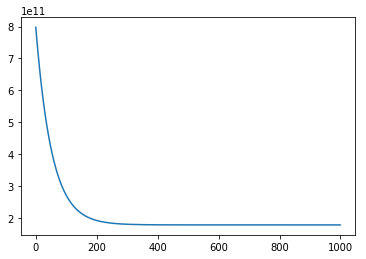

In [67]:
plt.plot(house.costs())
plt.show()

##### Thetas

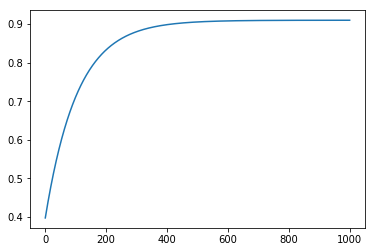

In [68]:
#First Theta
plt.plot([house.thetas()[i][0] for i in range(len(house.thetas()))])
plt.show()

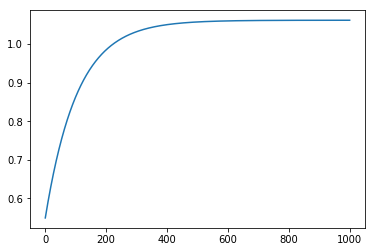

In [69]:
#Second Theta
plt.plot([house.thetas()[i][1] for i in range(len(house.thetas()))])
plt.show()

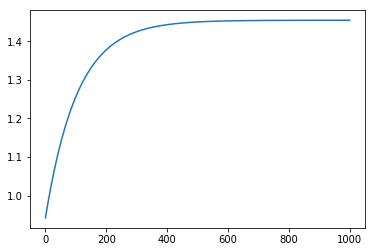

In [70]:
#Second Theta
plt.plot([house.thetas()[i][2] for i in range(len(house.thetas()))])
plt.show()

##### Model

In [71]:
house.minimized()['hypothesis']

array([[ 1363585.72333842,  1381381.60245939,  2626730.42673847,
         1354200.05372868]])

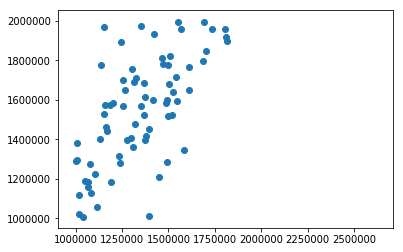

In [72]:
plt.plot(house.minimized()['hypothesis'], np.array(data['Total Assets'][:4]).reshape(1,4), 'k')
plt.scatter(data['Total Deposits'], data['Total Assets'])
plt.show()

### Testing

In [22]:
a = np.array([[1,2,3], [4,5,6]])

In [23]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
a.shape

(2, 3)

In [26]:
a.reshape(1, 6)

array([[1, 2, 3, 4, 5, 6]])

In [27]:
a = np.array([[5,2,3],[1,2,3]])

In [31]:
np.multiply(*a.shape)

6